In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy import stats

# Scale 변환-> 설명변수 변환 : 회귀분석.설명변수 회귀계수 표준화
from sklearn.preprocessing import StandardScaler

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# 회귀모델 
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error



In [2]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/SCALE불량.csv",encoding = "euc-kr")
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [4]:
df_raw.drop(['plate_no','rolling_date','spec_long','spec_country'], axis = 1, inplace = True)
##plate_no/ 고유변호로 큰의미가 없음
##rolling_date/시작시간이라 큰 의미가 없음
##spec_long,spec_country/고객들이 요구한 제품이라 제품 규격은 큰의미 없음

In [5]:
df_raw['scale'].replace({"양품":0,"불량":1},inplace=True)
##scale이 목표변수이기 때문에 컴퓨터가 읽을 수 있게 변환
##양품=0,불량품=1로 구분했다.

In [6]:
## 열이나 호기 단위를 없앰(단위제거)
df_raw['fur_no'] = df_raw['fur_no'].str.replace("호기", "")
df_raw['fur_input_row'] = df_raw['fur_input_row'].str.replace("열", "")
df_raw['work_group'] = df_raw['work_group'].str.replace("조", "")

In [7]:
df_raw['hsb'].replace({"적용": 0, "미적용": 1}, inplace=True)
df_raw['rolling_method'].replace({"TMCP(온도제어)": 0, "CR(제어압연)": 1}, inplace=True)

In [8]:
df_raw['hsb'].value_counts()

0    953
1     47
Name: hsb, dtype: int64

In [9]:
df_raw = df_raw[df_raw['hsb'] == 0]  # hsb 적용이 0으로 인코딩되어 있다고 가정

In [10]:
df_raw['hsb'].value_counts()

0    953
Name: hsb, dtype: int64

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

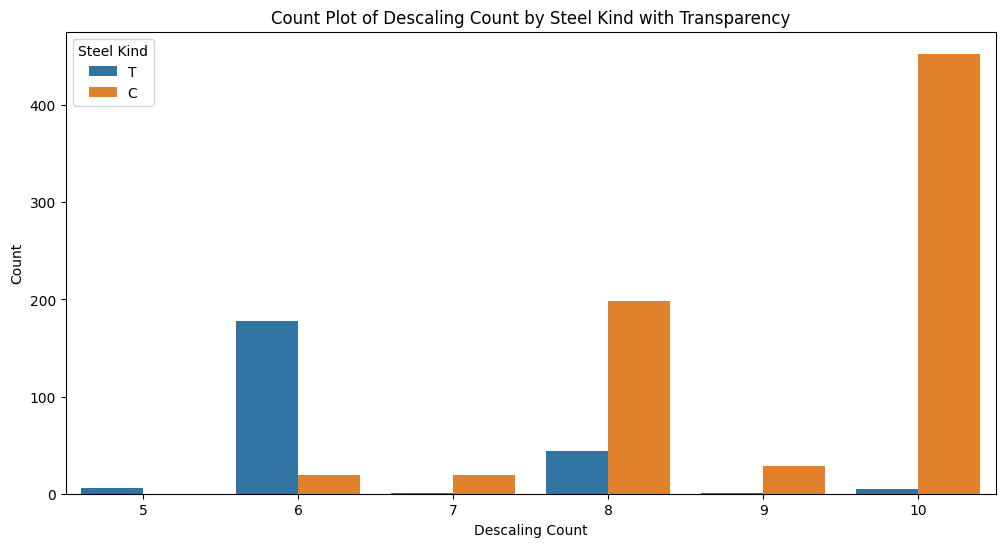

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 하나의 그래프에 투명도를 조정하여 겹치는 카운트 플롯 생성
plt.figure(figsize=(12, 6))
sns.countplot(x='descaling_count', hue='steel_kind', data=df_raw, dodge=True)
plt.title('Count Plot of Descaling Count by Steel Kind with Transparency')
plt.xlabel('Descaling Count')
plt.ylabel('Count')
plt.legend(title='Steel Kind')
plt.show()

7. [가정] 제어압연(T) / 온도제어압연(C) 중 제어압연이 "공정 특성 상" 스케일이 더 많이 생긴다

    가정 1. 제어압연이 빠르고 싸고 대량생산에 더 적합
    가정 2. 온도제어압연은 스케일에 강함?
    
    제어압연(T)과 온도제어압연(C) 간의 스케일 발생 빈도를 비교한 결과 
    1. 제어압연(T)의 스케일 발생 빈도가 상대적으로 낮다.
    2. 온도제어압연(C)에서 더 높은 빈도로 스케일이 발생하고 있다.
    
    
    
스케일 발생 빈도
- 제어압연(T)에서는 스케일 발생 빈도가 6에서 높게 나타나지만 다른 값에서는 거의 발생 x
- 온도제어압연(C)에서는 스케일 발생 빈도가 10에서 매우 높게 나타남


[가정 검토]
가정0.은 관찰된 데이터와 불일치 -> 온도제어압연(C)에서 더 높은 스케일 발생 빈도 관찰(10)
가정1.은 "스케일 발생 빈도"와 직접적인 연관 X을 수 있다. -> 공정 효율성과 비용에 대한 분석 필요(우리는 비용, 효율성 모두 자료 X)
가정2.는 온도제어압연(C)에서 더 높은 스케일 빈도가 나타나기 때문에(10) 가정 재검토
즉, 도메인의 "공정 특성 상"과 반대되는 결과 -> 다시 검토

[가정 재검토]
    제어압연(T)이 공정 특성상 스케일이 더 많이 생기고, 온도 제어압연(C)이 스케일에 강하다.
    1. 스케일 발생 정의 재검토
    스케일 발생 빈도를 단순한 카운트로만 보고 있다.(0, 1)
    스케일의 심각도(크기, 두께 등) 품질에 미치는 영향과 같은 추가적인 변수 고려
    단순히 발생 횟수만 보지 않고, 발생한 스케일의 성질을 분석함으로써 제어압연(T)이 더 불리한 경우 찾을 수 있음
    2. 다중 회귀 분석 또는 분산 분석(ANOVA) 
    -> 여러 변수를 동시에 고려하여 스케일 발생에 대한 영향을 정량적으로 분석
    -> 각 공정 변수가 스케일 발생에 미치는 영향을 독립적으로 평가
    3. 공정별 특성 분석
    
[가정이 데이터 결과와 일치하지 않은 가장 큰 원인]
공정 조건의 차이

제어압연과 온도제어압연이 동일하지 않은 조건(온도, 압력, 속도 등)에서 수행되었다면, 이러한 차이가 스케일 발생 빈도에 영향을 주어 가정과 다른 결과를 초래할 수 있음
각 공정이 다른 조건에서 운영되면, 이는 공정 특성보다 조건의 영향을 반영한 결과가 나타날 수 잇다. 즉, 제어압연(T)이 더 많은 스케일을 발생시킨다는 가정이 맞더라도, 온도제어압연(c)이 더 불리한 조건에서 수행되었다면 데이터는 그 가정을 반영하지 못 할 수 있다.

    

In [12]:
# 교차표 생성
crosstab = pd.crosstab(df_raw['rolling_method'], df_raw['scale'])
crosstab


scale,0,1
rolling_method,,
0,147,7
1,543,256


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

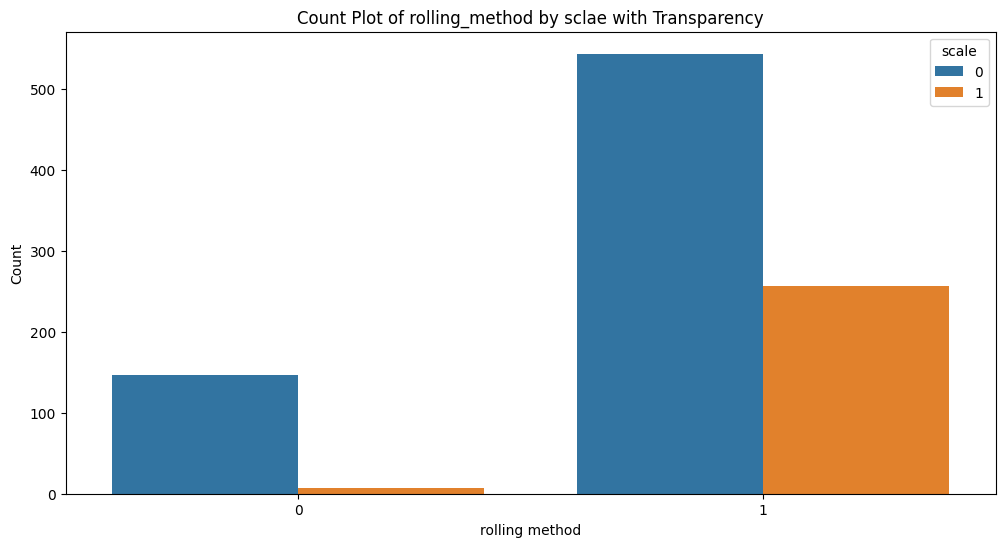

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 하나의 그래프에 투명도를 조정하여 겹치는 카운트 플롯 생성
plt.figure(figsize=(12, 6))
sns.countplot(x='rolling_method', hue='scale', data=df_raw, dodge=True)
plt.title('Count Plot of rolling_method by sclae with Transparency')
plt.xlabel('rolling method')
plt.ylabel('Count')
plt.legend(title='scale')
plt.show()

8. 압연 공정 온도가 높을 수록 스케일이 많이 생긴다.
파랑 스케일 발생x
주왕 스케일 발생O
0번 낮은 온도
1번 높은 온도

1. 낮은 온도(0)에서는 스케일 발생하지 않은 경우(파)가 많으며, 스케일이 발생한 경우(주)는 거의 없다.
2. 높은 온도(1)에서는 스케일 발생하지 않는 경우(파)가 많으며, 스케일 발생한 경우(주)도 상당한 비중을 차지하고 있다.

[가정 검증]
높은 온도에서 스케일 발생 비율이 > 낮은 온도에서 스케일 발생 비율보다 높은 것을 보여줌.
즉, 높은 온도에서 스케일 발생이 더 빈번하게 나타날 것

가정은 따르지만 다른 환경 요인이 있는지 분석
1. 재료의 종류 및 성질 -> 다른 재료(C, T)는 같은 온도에서도 스케일 발생이 다르게 반응할 수 있다. 재료 특성에 따른 스케일 발생 차이 고려
2. 환경조건 -> 산화 분위기(산소의 농도, 산화성 가스 등이 스케일 발생에 영향을 줄 수 있다. 산화 분위기가 더 강하면 스케일이 더 두껍게 형성될 가능성이 있다.

In [14]:
correlation = df_raw['rolling_temp'].corr(df_raw['scale'])
print(f"Correlation between rolling_temp and Scale: {correlation}")

Correlation between rolling_temp and Scale: 0.402369837455926


In [ ]:
# 7번의 가정이 틀려서 가정에 맞게 구현하려면 어떤 걸 검토해야할까?
# 1. 스케일 정의 재검토 -> 크기, 두께 파생변수 여부 미정
# 2. ANOVA

# 범주형 변수 선택
categorical_variables = ['rolling_method', 'rolling_temp', 'descaling_count', 'scale']

# 각 범주형 변수와 scale 간의 ANOVA 검정 수행
for var in categorical_variables:
    formula = f'scale ~ C({var})'  # ANOVA 모델 formula 생성
    model = ols(formula, data=df_raw).fit()  # ANOVA 모델 피팅
    anova_table = sm.stats.anova_lm(model)  # ANOVA 결과 테이블 생성
    
    print(f'ANOVA test for {var}:')
    print(anova_table)
    print()

1. 첫 번째 ANOVA 결과 요약:
rolling_method (압연 방법):

F-값: 34.67
p-값: 
5.35
×
1
0
−
9
5.35×10 
−9
 
유의미한 영향 (p-value < 0.05)
rolling_temp (압연 온도):

F-값: 130.91
p-값: 
1.45
×
1
0
−
28
1.45×10 
−28
 
매우 유의미한 영향 (p-value < 0.05)
descaling_count (스케일 제거 횟수):

F-값: 51.08
p-값: 
1.71
×
1
0
−
12
1.71×10 
−12
 
유의미한 영향 (p-value < 0.05)
2. 두 번째 ANOVA 결과 요약:
rolling_method (압연 방법):

F-값: 48.29
p-값: 
6.64
×
1
0
−
12
6.64×10 
−12
 
유의미한 영향 (p-value < 0.05)
rolling_temp (압연 온도):

F-값: 5.84
p-값: 
1.06
×
1
0
−
75
1.06×10 
−75
 
매우 유의미한 영향 (p-value < 0.05)
descaling_count (스케일 제거 횟수):

F-값: 54.03
p-값: 
1.15
×
1
0
−
49
1.15×10 
−49
 
유의미한 영향 (p-value < 0.05)
scale (스케일 자체에 대한 테스트):

F-값: 
2.82
×
1
0
32
2.82×10 
32
 
p-값: 0.0
이 결과는 매우 유의미하며, 스케일 자체가 분석에서 큰 영향을 미친다는 것을 나타냅니다.
비교 분석:
1. F-값:
두 결과 모두에서 rolling_method, rolling_temp, descaling_count에 대한 F-값이 높아, 이 변수들이 스케일 불량에 유의미한 영향을 미친다고 볼 수 있습니다.
두 번째 결과에서 특히 scale에 대한 F-값이 매우 크고 유의미하며, 이는 스케일 불량 여부 자체가 데이터에 매우 큰 영향을 미치고 있음을 나타냅니다.
2. p-값:
두 결과 모두에서 p-값이 매우 낮아, 유의미한 결과를 나타내고 있습니다.
특히 두 번째 결과에서 scale의 p-값이 0으로 나와 스케일 불량 여부가 다른 변수들에 비해 매우 큰 영향을 미친다고 볼 수 있습니다.
결론:
두 번째 ANOVA 결과는 F-값과 p-값에서 모든 변수에 대해 매우 강력한 유의성을 보여주고 있습니다. 특히, 스케일 자체에 대한 F-값이 매우 커, 이 분석이 더 강력한 설명력을 가지고 있다고 볼 수 있습니다.
첫 번째 결과도 유의미하지만, 두 번째 결과가 변수들에 대해 더 높은 유의성과 설명력을 가지므로 두 번째 ANOVA 결과가 더 좋은 결과로 판단할 수 있습니다.
이는 두 번째 분석이 더 많은 데이터를 설명하고 있으며, 스케일 불량의 주요 원인을 더욱 명확하게 식별하는 데 도움이 된다고 결론지을 수 있습니다.